# One Way Anova Class Removal

## Data Importation

In [1]:
from google.colab import files
uploaded = files.upload()

Saving x_train.pkl to x_train.pkl
Saving y_train.pkl to y_train.pkl
Saving y_train_time.pkl to y_train_time.pkl


In [2]:
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np



X_train = pd.read_pickle("./x_train.pkl")
y_train = pd.read_pickle("./y_train.pkl")
y_train_time = pd.read_pickle("./y_train_time.pkl")
features = X_train.columns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
X_train.describe()

,v_Vel,lateral_current_lane,v_Vel_Ref1,v_Vel_Ref2,v_Vel_Ref3,longit_pos_vehicle1,longit_pos_vehicle2,longit_pos_vehicle3,lat_pos_vehicle1,lat_pos_vehicle2,iTTC_ref3,v_Vel_preced1,v_Vel_follow1,v_Vel_preced2,v_Vel_follow2,longit_pos_preced1,longit_pos_follow1,longit_pos_preced2,longit_pos_follow2,iTTC_preced1,iTTC_follow1,iTTC_preced2,iTTC_follow2
count,8580.000000,8580.000000,8580.000000,8580.000000,8580.000000,8580.000000,8580.000000,8580.000000,8580.000000,8580.000000,8580.000000,8580.000000,8580.000000,8580.000000,8580.000000,8580.000000,8580.000000,8580.000000,8580.000000,8580.000000,8580.000000,8580.000000,8580.000000
mean,40.453911,0.685646,39.475647,41.457775,39.640533,1.510839,1.172005,-87.180550,10.114003,-11.592632,-0.189172,40.175976,38.564167,41.818813,40.483372,-100.107292,89.703667,-99.414055,90.682640,0.059826,-0.091683,0.041740,-0.084867
std,13.434966,4.105920,13.365635,12.972980,13.846755,44.594448,44.056576,68.779503,3.692618,3.464538,0.921339,13.914819,13.108292,13.534307,12.573971,81.844696,59.178524,87.237144,63.181236,0.510419,0.532761,0.518213,0.472498
min,0.000000,-7.299000,0.000000,0.000000,0.000000,-209.179001,-251.395996,-772.500000,0.129000,-22.302999,-13.680349,0.000000,0.000000,0.000000,0.000000,-777.731018,4.000000,-1141.500000,8.500000,-1.800245,-3.052539,-4.278818,-3.333732
25%,31.007500,-2.549250,30.129999,33.817500,30.257500,-27.501250,-25.629750,-97.177999,6.503500,-13.787000,-0.554062,30.525001,30.000000,34.007499,32.750000,-125.214003,53.647751,-127.909252,52.112749,-0.140360,-0.409652,-0.135346,-0.353873
50%,40.000000,0.016000,39.990002,40.380001,39.970001,-1.000000,-1.000000,-66.638000,10.851000,-11.608000,0.000000,40.000000,39.900002,41.139999,40.000000,-80.232502,78.575500,-77.070499,78.887501,0.000000,-0.001686,0.000000,0.000000
75%,50.000000,4.630250,49.472501,50.000000,50.000000,24.179999,21.337750,-47.021251,12.866500,-9.112750,0.288435,50.000000,46.910000,50.787499,49.980000,-52.528499,113.659750,-49.499750,119.622501,0.331124,0.155639,0.282657,0.097129
max,83.879997,9.431000,85.209999,77.500000,79.989998,335.311005,277.500000,-0.115000,20.997000,-0.014000,4.662430,75.320000,76.519997,85.010002,76.529999,-4.000000,461.852997,-5.330000,500.384003,2.074497,3.545433,5.542541,2.109233


In [0]:
dataFrames = pd.concat([X_train, y_train], axis=1, sort=False)
dataFrames.rename(columns={'class': 'state'}, inplace=True)

150.10967383509688
205.95487835318394
172.26012612741548
0.21746302024740216
2.833547666511207
2.9490983066205674
147.56850617239536
239.29662039085935
137.29696118435567
141.10830266380663
176.82978125476185
169.9151853131242
159.911545723712
228.78417451802127
178.1123443742317
820.847487471951
1667.9206494928917
3458.7332212193423
1122.5137418837564
3887.3001672101095
773.7695644283465
3179.0237818547816
7756.734193824713
2347.9166300136294
5.674398937915439
4.007970428317513
3.3717535473013265
4.292964829815482
4.1653713794328455
5.020428132419864
0.2088168692521303
0.8316865936329949
1.3272809806589165
162.83613801350225
244.94269882902117
161.9361434769809
143.9208301138118
226.24678689908654
133.55615203513287
161.40241947006166
186.1873285550228
181.8034630813983
132.56783336955715
170.53730552112177
161.93428126570427
3711.418357773224
10941.386590482003
4852.248876182274
2562.883729344848
4349.225432744919
2851.18434871939
3944.161883653406
11048.802078395616
4785.62528444302

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:318: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:318: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


0.2392473331707878
0.29027878255652223
0.31651938323983503
0.2865239167795999
0.32523974909103426
0.19316912489554527


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:318: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


0.19585292450781344
0.2766498837070396
0.18780373122822228


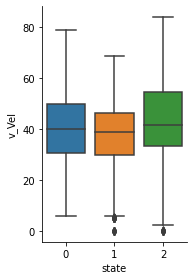

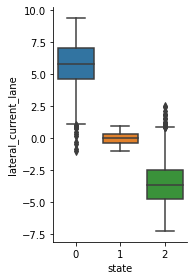

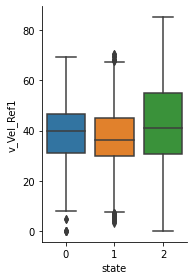

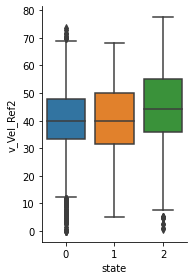

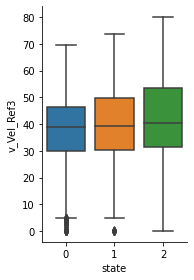

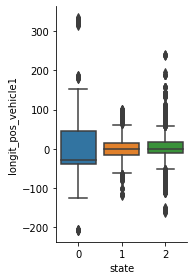

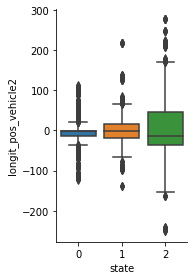

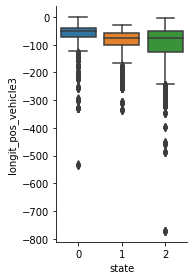

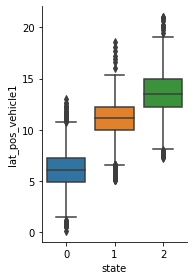

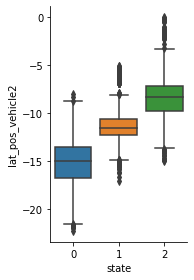

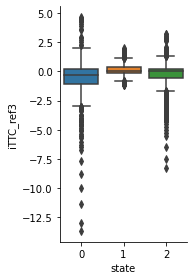

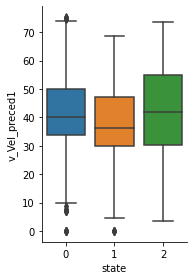

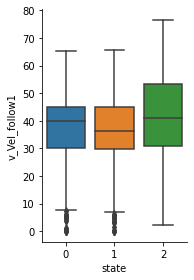

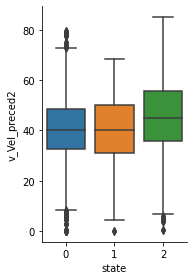

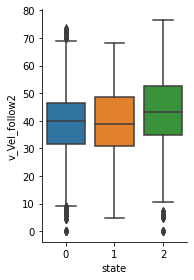

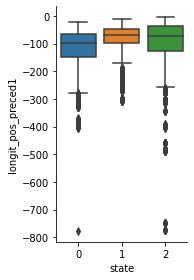

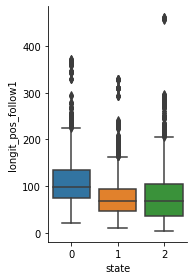

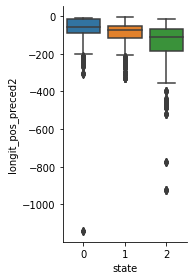

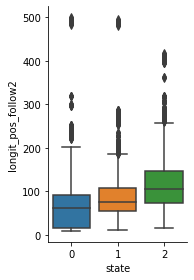

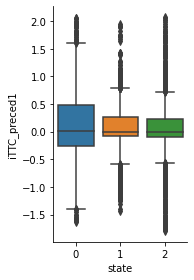

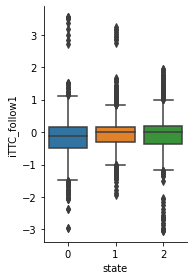

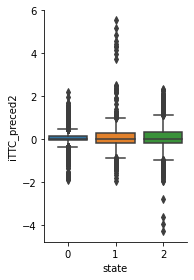

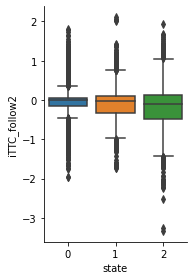

In [6]:
import seaborn as sns
from statistics import variance
for feature in features :
  ax = sns.catplot(x="state", y= feature, data=dataFrames, kind="box", height=4, aspect=.7)
  print(stats.tvar(dataFrames[feature][dataFrames['state'] == 1]))
  print(stats.tvar(dataFrames[feature][dataFrames['state'] == 2]))
  print(stats.tvar(dataFrames[feature][dataFrames['state'] == 0]))

#High difference in variances makes it unreliable to perform anova
#For many features they are not equally distributed between classes 



In [0]:
def anova_features_selection(xdf, ydf, threshold) :
 
  """Returns only the best feature set's metric dictionnary.

      Parameters
      ----------
      xdf : Panda DataFrame object
          DataFrame containing our data samples.
      
      ydf : Panda DataFrame object
          DataFrame containing our class values

      threshold : double
          Sets the acceptance threshold 

      Returns
      -------
          List of removed features and the list of remaining features,
        
    """  
  features = xdf.columns
  removed_feature = []
  dataFrames = pd.concat([xdf, ydf], axis=1, sort=False)
  dataFrames.rename(columns={'class': 'state'}, inplace=True)
  for feature in features :
    ano = ols(feature + ' ~ state' , data = dataFrames).fit()
    aov_table = sm.stats.anova_lm(ano, typ=2)
    if aov_table['PR(>F)']['state'] < threshold :
      removed_feature.append(feature)
  remaining_feature = [feature for feature in features if feature not in removed_feature]
  print("\t---------------------------------\t")
  print ("The removed features for a 0.05  threshold are :")
  for feature in removed_feature :
    print(feature +"\t")
  print ("Making " + str(len(removed_feature)) + "removed features")
  print("\t---------------------------------\t")
  print("\t---------------------------------\t")
  print ("The remaining features are:")
  for feature in remaining_feature : 
    print (feature)
  print ("Making " + str(len(remaining_feature)) + " remaining features")
  print("\t---------------------------------\t")

  return remaining_feature, removed_feature

In [17]:
remaining_features, removed_features = anova_features_selection(X_train,y_train,0.05)

	---------------------------------	
The removed features for a 0.05  threshold are :
v_Vel	
lateral_current_lane	
v_Vel_Ref1	
v_Vel_Ref2	
v_Vel_Ref3	
longit_pos_vehicle1	
longit_pos_vehicle2	
longit_pos_vehicle3	
lat_pos_vehicle1	
lat_pos_vehicle2	
iTTC_ref3	
v_Vel_preced1	
v_Vel_follow1	
v_Vel_preced2	
v_Vel_follow2	
longit_pos_preced1	
longit_pos_follow1	
longit_pos_preced2	
longit_pos_follow2	
iTTC_preced1	
iTTC_follow1	
iTTC_preced2	
iTTC_follow2	
Making 23removed features
	---------------------------------	
	---------------------------------	
The remaining features are:
Making 0 remaining features
	---------------------------------	
